# EL2805 - Reinforcement Learning - Lab 1
Valeria Grotto (200101266021) & Dalim Wahby (19970606-T919)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import problem1 as mz 
import matplotlib.pyplot as plt 

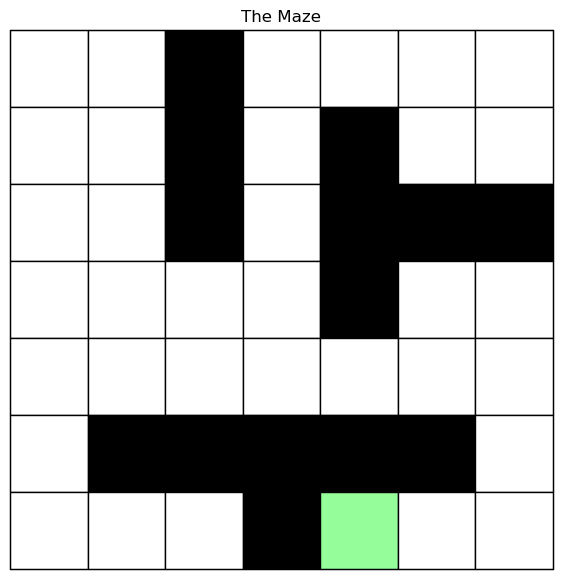

In [3]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 2, 0, 0]

])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

mz.draw_maze(maze)

env = mz.Maze(maze,key=False)

In [4]:
# Finite horizon
horizon = 15
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming_minotaur(env,horizon);

0

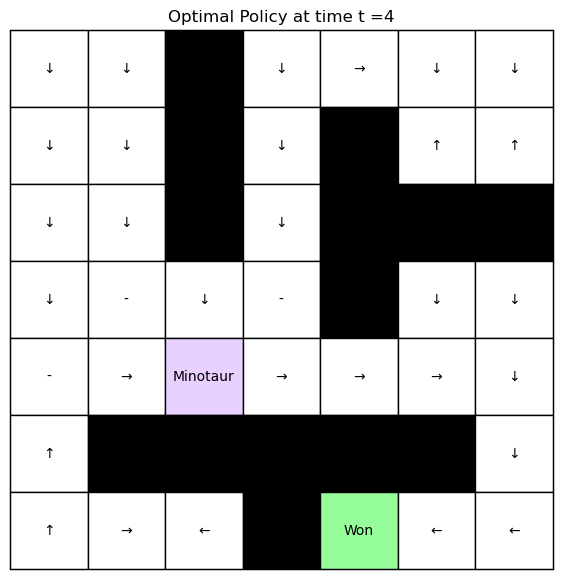

In [5]:
minotaur = (4,2)
time = 4
mz.draw_policy(env, minotaur, policy, time)

In [6]:
print(policy[:, horizon])

[0. 0. 0. ... 1. 0. 0.]


## Dynamic Programming

In [7]:

# Simulate the shortest path starting from position (0,0) and using Dynamic Programming
method = 'DynProg';
start  = (0,0);
minotaur_start= (6,4);
path, minotaur_path, lost, won = env.simulate_minotaur(start, minotaur_start, policy, method);

 
if(won):
  print('won')
else:
  print('lost');

won


In [8]:
print(path)
print(minotaur_path)

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (5, 6), (6, 6), (6, 5), (6, 4)]
[(6, 4), (5, 4), (6, 4), (5, 4), (5, 5), (6, 5), (6, 4), (6, 3), (5, 3), (6, 3), (6, 4), (6, 5), (6, 4), (5, 4), (5, 3), (6, 3)]


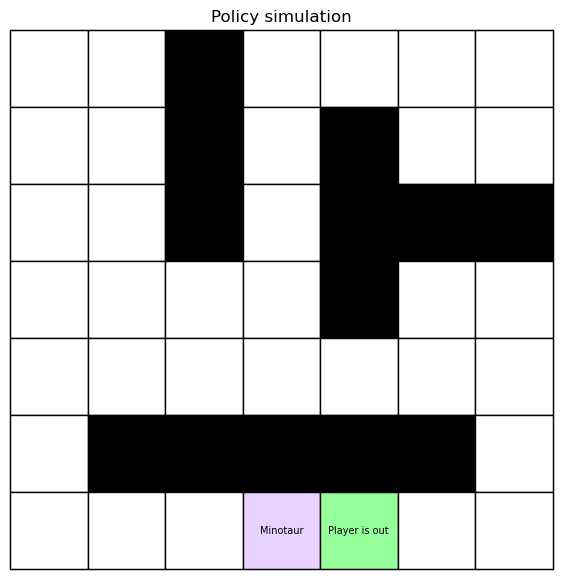

In [9]:
# Show the shortest path 
mz.animate_solution(maze, path, minotaur_path)

In [10]:
def get_probability(start,minotaur_start, policy,method, epochs , key = False):
  win_count= 0

  for i in range(epochs):
    _, _, _, won = env.simulate_minotaur(start, minotaur_start, policy, method, key);
    if(won):
      win_count +=1;
  print(win_count," / ",epochs)
  return win_count/epochs

In [11]:
get_probability(start,minotaur_start, policy,method, 10000)

10000  /  10000


1.0

In [12]:
probabilities = []
horizon_list = []
for i in range(30):
  time = i+1
  horizon_list.append(time)
  # Solve the MDP problem with dynamic programming 
  V, policy= mz.dynamic_programming_minotaur(env,time);
  print(i,":")
  probabilities.append(get_probability(start,minotaur_start, policy,method, 10000))

print(probabilities)

0 :
0  /  10000
1 :
0  /  10000
2 :
0  /  10000
3 :
0  /  10000
4 :
0  /  10000
5 :
0  /  10000
6 :
0  /  10000
7 :
0  /  10000
8 :
0  /  10000
9 :
0  /  10000
10 :
0  /  10000
11 :
0  /  10000
12 :
0  /  10000
13 :
1909  /  10000
14 :
10000  /  10000
15 :
10000  /  10000
16 :
10000  /  10000
17 :
10000  /  10000
18 :
10000  /  10000
19 :
10000  /  10000
20 :
10000  /  10000
21 :
10000  /  10000
22 :
10000  /  10000
23 :
10000  /  10000
24 :
10000  /  10000
25 :
10000  /  10000
26 :
10000  /  10000
27 :
10000  /  10000
28 :
10000  /  10000
29 :
10000  /  10000
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1909, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


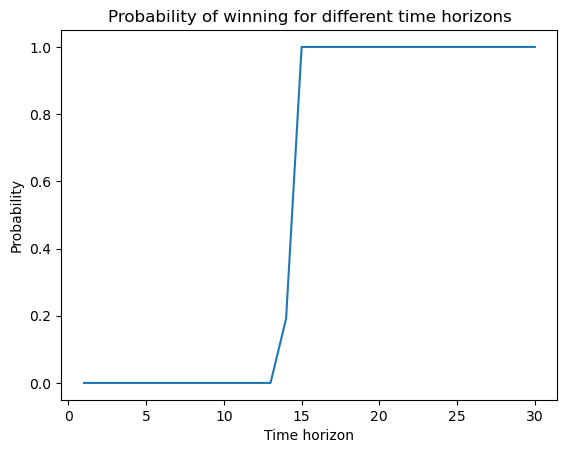

In [13]:

# x axis values 
x = horizon_list
# corresponding y axis values 
y = probabilities
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('Time horizon') 
# naming the y axis 
plt.ylabel('Probability')
  
# giving a title to my graph 
plt.title('Probability of winning for different time horizons')

# Set the range of x-axis
#plt.ylim(0, 1.2)
  
# function to show the plot 
plt.show() 

## Value Iteration

Life geometrically distributed with mean 30.

In [14]:
# Discount Factor 
gamma   = 29/30; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration_minotaur(env, gamma, epsilon)

0

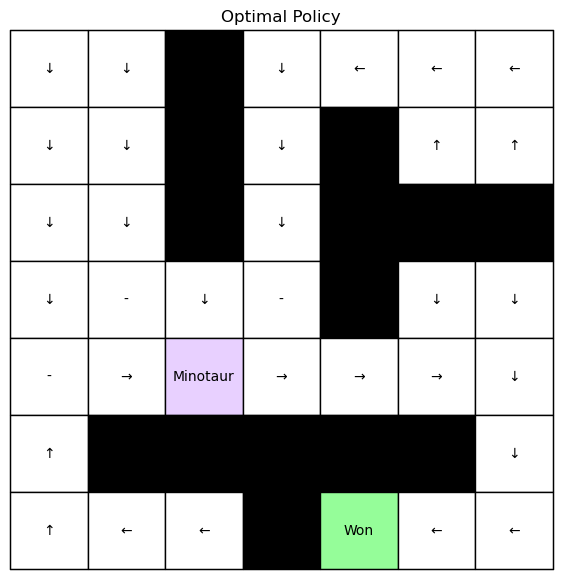

In [15]:
minotaur = (4,2)
mz.draw_policy(env, minotaur, policy, time=-1)

In [16]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0);
minotaur_start= (6,4);
path, minotaur_path,lost, won = env.simulate_minotaur(start, minotaur_start, policy, method);
if(lost):
  print('lost');
else:
  print('won')

won


In [17]:
print(path)
print(minotaur_path)

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4)]
[(6, 4), (6, 3), (6, 2), (6, 1), (6, 2), (6, 3), (5, 3), (5, 2), (5, 3), (5, 2), (6, 2), (6, 1), (5, 1), (5, 2), (6, 2), (5, 2)]


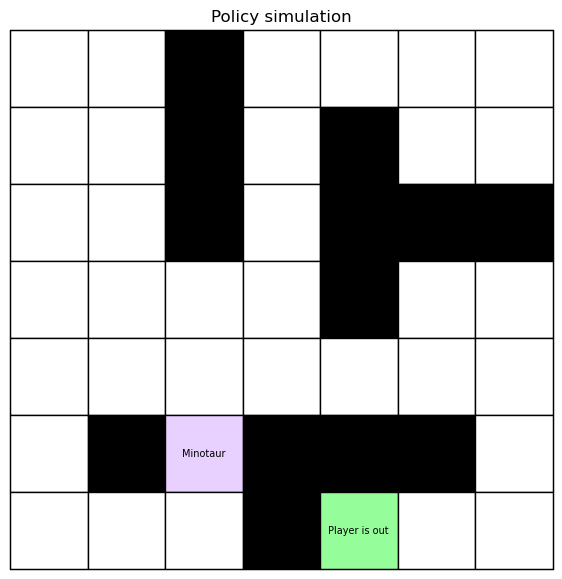

In [18]:
mz.animate_solution(maze, path, minotaur_path)

### f) Probability of Winning by simulating 10000 games

In [19]:
get_probability(start,minotaur_start, policy,method, 10000)

10000  /  10000


1.0

### h) Value iteration with key

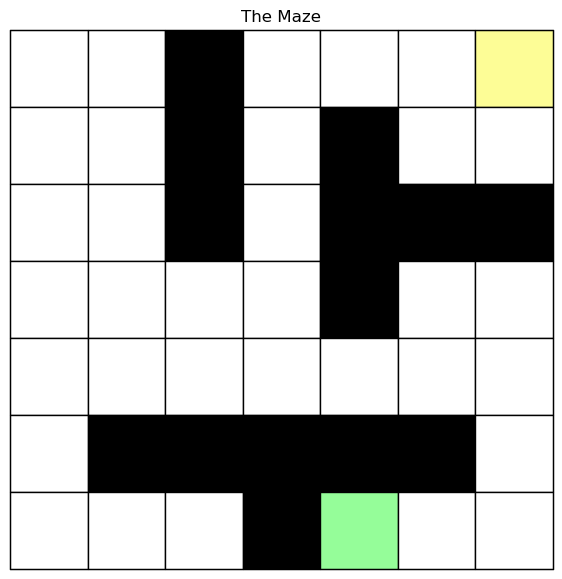

In [20]:
# New maze
maze = np.array([
    [0, 0, 1, 0, 0, 0, 3],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 3 = key
mz.draw_maze(maze)
env = mz.Maze(maze, key = True)

In [21]:
# Discount Factor 
gamma   = 49/50; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration_minotaur(env, gamma, epsilon)

0

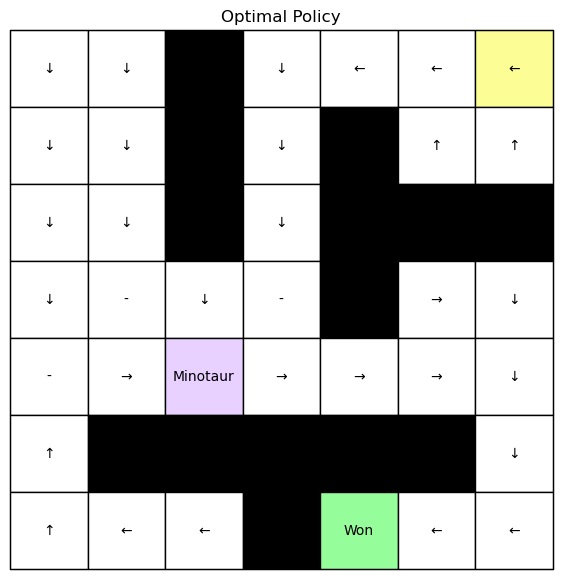

In [22]:
minotaur = (4,2)
mz.draw_policy(env, minotaur, policy, time=-1, key = True, key_val=1)

In [23]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start = (0,0);
minotaur_start = (6,4)
path, minotaur_path,lost, won = env.simulate_minotaur(start, minotaur_start, policy, method, key = True);
if(lost):
  print('lost');
else:
  print('won')

won


### Q learning epsilon-greedy

In [24]:
# New maze
maze = np.array([
    [0, 0, 1, 0, 0, 0, 3],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 2, 0, 0]

])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 3 = key
env = mz.Maze(maze, key = True)

In [25]:
start = (0,0)
minotaur_start = (6,4)
episodes = 50000
alpha = 0.6
# Discount Factor (life geometrically distributed with mean 50)
gamma   = 49/50; 
epsilon = 0.5
key_cell = (0,6)
Q, estimated_policy, vf_initial = env.Q_learning_greedy(start, minotaur_start, key_cell, alpha, gamma, epsilon, episodes, key = True)

0

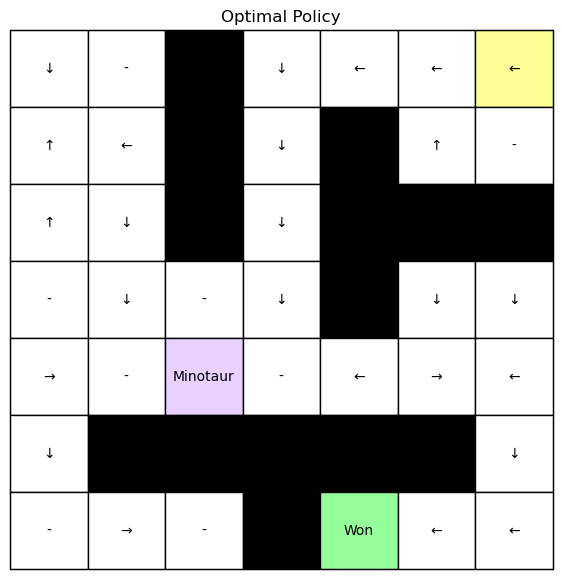

In [26]:
minotaur = (4,2)
time = 4
mz.draw_policy(env, minotaur, estimated_policy, time = -1, key =True, key_val = 1)

In [27]:
epsilon = 0.2
Q, estimated_policy_2, vf_initial_2 = env.Q_learning_greedy(start, minotaur_start, key_cell, alpha, gamma, epsilon, episodes, key = True)

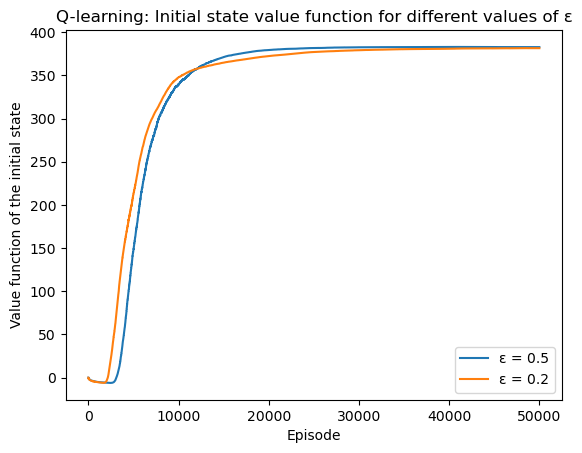

In [28]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = np.arange(1, episodes+1)
  
# plotting the points  
plt.plot(x, vf_initial, label = "\u03B5 = 0.5") 

plt.plot(x, vf_initial_2, label = "\u03B5 = 0.2") 
  
# naming the x axis 
plt.xlabel('Episode') 
# naming the y axis 
plt.ylabel('Value function of the initial state')
  
# giving a title to my graph 
plt.title('Q-learning: Initial state value function for different values of \u03B5')
plt.legend()   
# function to show the plot 
plt.show() 

### Fix epsilon, show the convergence for 2 different step sizes

In [29]:
start = (0,0)
minotaur_start = (6,4)
episodes = 50000
alpha = 0.6
# Discount Factor (life geometrically distributed with mean 50)
gamma   = 49/50; 
epsilon = 0.5
key_cell = (0,6)
Q, estimated_policy, vf_initial = env.Q_learning_greedy(start, minotaur_start, key_cell, alpha, gamma, epsilon, episodes, key = True)

In [30]:
alpha = 0.8
Q, estimated_policy, vf_initial_2 = env.Q_learning_greedy(start, minotaur_start, key_cell, alpha, gamma, epsilon, episodes, key = True)

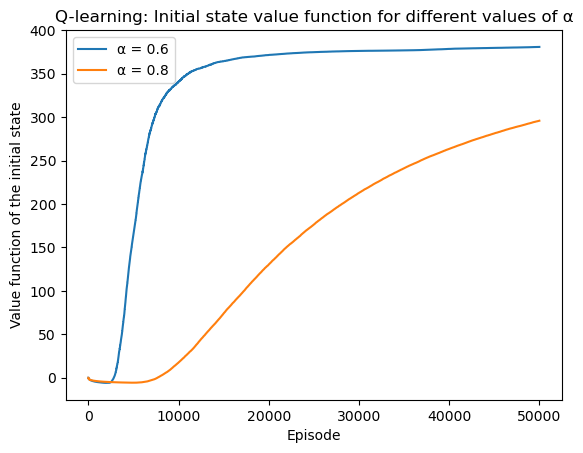

In [31]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = np.arange(1, episodes+1)
  
# plotting the points  
plt.plot(x, vf_initial, label = "\u03B1 = 0.6") 

plt.plot(x, vf_initial_2, label = "\u03B1 = 0.8") 
  
# naming the x axis 
plt.xlabel('Episode') 
# naming the y axis 
plt.ylabel('Value function of the initial state')
  
# giving a title to my graph 
plt.title('Q-learning: Initial state value function for different values of \u03B1')
plt.legend()   
# function to show the plot 
plt.show() 

## SARSA

In [32]:
start = (0,0)
minotaur_start = (6,4)
episodes = 50000
# Discount Factor (life geometrically distributed with mean 50)
gamma   = 49/50; 
alpha_val = 2/3
key_cell = (0,6)

In [33]:
epsilon = 0.2
Q_sarsa, estimated_pi_sarsa, vf_initial_sarsa = env.sarsa(start, minotaur_start, key_cell, alpha_val, gamma, epsilon, episodes, True)

In [34]:
epsilon = 0.1
Q_sarsa_2, estimated_pi_sarsa_2, vf_initial_sarsa_2 = env.sarsa(start, minotaur_start, key_cell,  alpha_val, gamma, epsilon, episodes, True)

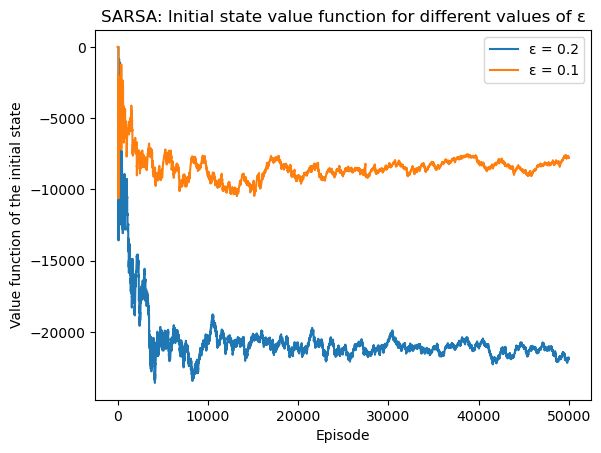

In [35]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = np.arange(1, episodes+1)
  
# plotting the points  
plt.plot(x, vf_initial_sarsa, label = "\u03B5 = 0.2") 

plt.plot(x, vf_initial_sarsa_2, label = "\u03B5 = 0.1") 
  
# naming the x axis 
plt.xlabel('Episode') 
# naming the y axis 
plt.ylabel('Value function of the initial state')
  
# giving a title to my graph 
plt.title('SARSA: Initial state value function for different values of \u03B5')
plt.legend()   
# function to show the plot 
plt.show() 

### 3) Decreasing epsilon at each episode

In [36]:
Q_sarsa_e, estimated_pi_sarsa_e, vf_initial_sarsa_e = env.sarsa(start, minotaur_start, key_cell, alpha_val, gamma, epsilon, episodes, True, 0.4)

In [37]:
Q_sarsa_e2, estimated_pi_sarsa_e2, vf_initial_sarsa_e2 = env.sarsa(start, minotaur_start, key_cell, alpha_val, gamma, epsilon, episodes, True, 0.8)

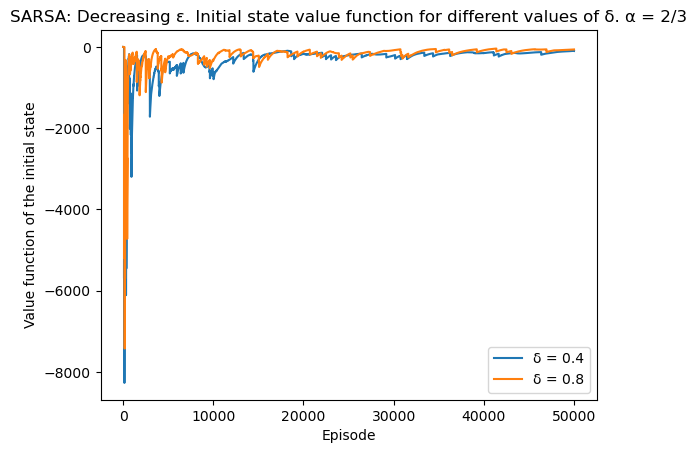

In [38]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = np.arange(1, episodes+1)
  
# plotting the points  
plt.plot(x, vf_initial_sarsa_e, label = "\u03B4 = 0.4") 

plt.plot(x, vf_initial_sarsa_e2, label = "\u03B4 = 0.8") 
  
# naming the x axis 
plt.xlabel('Episode') 
# naming the y axis 
plt.ylabel('Value function of the initial state')
  
# giving a title to my graph 
plt.title('SARSA: Decreasing \u03B5. Initial state value function for different values of \u03B4. \u03B1 = 2/3')
plt.legend()   
# function to show the plot 
plt.show() 

### k) Probability of leaving the maze alive with Q-learning and SARSA

In [42]:
#SARSA
policy = estimated_pi_sarsa
method = 'sarsa'
get_probability(start,minotaur_start, policy,method, 10000, key = True)

0  /  10000


0.0

In [40]:
#Qlearning
policy = estimated_policy
method = 'Qlearning'
get_probability(start,minotaur_start, policy,method, 10000, key=True)

203  /  10000


0.0203